<div style="align-items: center; justify-content: space-between;">
   
   <h1>Data Pipeline | AWS - Telegram</h1>
   <b> por <a href="https://www.linkedin.com/in/alex-alves-dev/">Alex Alves</a></b>
   <br><br>
   <img src="https://raw.githubusercontent.com/carneiro-fernando/EBAC/a4a2850a42490d15d266fa584c49fb3a8120fcdb/assets/Images/Projeto_Telegram_pipeline/header_pipeline_aws_chats.drawio.svg"  align="center" alt="data-pipeline" width="auto">

</div>

# **Tópicos**

<ol type="1">
  <li>Introdução</li>
  <li>Sistema transacional</li>
  <li>Sistema analítico</li>
  <li>Apresentação</li>
  <li>Conclusão</li>
</ol>

# **1. Introdução**

## 1.1 Objetivo

Este projeto tem como objetivo demonstrar o processo de extração de dados de plataformas de mensagens como Telegram e WhatsApp, sua transferência para um **Datalake**, processamento em lote na nuvem e posterior análise dos dados tratados. O foco está em como esses dados podem ser utilizados para extrair informações valiosas, aprimorar serviços e explorar novas oportunidades de monetização.

## 1.2 O que é Pipeline?

No contexto de ciência de dados, um ***pipeline*** é uma **sequência automatizada de processos** que realizam tarefas específicas, consumindo dados brutos de diversas fontes e movendo-os para um destino de armazenamento. O pipeline inclui etapas de processamento como filtragem e recursos de resiliência contra falhas, disponibilizando os dados para análise. Este conceito é inspirado na engenharia de software, onde um pipeline representa um fluxo contínuo de desenvolvimento e entrega de software.

*fonte: https://www.stitchdata.com/resources/what-is-data-pipeline/*

## 1.3 Pipeline do Projeto

O pipeline de dados deste projeto inicia com a ingestão de dados de usuários via uma API que conecta as fontes de dados à Amazon Web Services (AWS). Na AWS, os dados são recebidos por uma função Lambda, que os organiza diariamente no AWS S3. Um AWS Event Bridge aciona um processo em lote no Lambda, que transforma os dados brutos, extraindo informações relevantes (data da mensagem, nome e número do contato, e a mensagem) e armazenando-os de maneira organizada no S3. Para a visualização, tabelas criadas a partir dos arquivos Parquet permitem análises variadas usando SQL, possibilitando a extração desses dados para um dashboard posteriormente.

![Pipeline do projeto](https://raw.githubusercontent.com/carneiro-fernando/EBAC/db382413378537f201bed37cc51b427c83da5a5e/assets/Images/Projeto_Telegram_pipeline/pipeline_aws_chats.drawio.svg)

# **2. Sistema transacional**

Um sistema transacional é uma estrutura tecnológica e de dados que suporta as transações diárias de uma fonte de dados. Ele é responsável por coletar, registrar e transmitir dados para uma cadeia de processos que tratarão os dados para posterior análise. Em resumo, os sistemas transacionais são projetados para ingerir dados criados diariamente e salvá-los em um banco de dados ou *DataLake*.

*fonte: https://insightsoftware.com/encyclopedia/transactional-systems/*

## 2.1 Ingestão de dados

Neste projeto, a ingestão dos dados consiste na captura de mensagens de texto enviadas pela plataforma do Telegram em tempo real, fornecidas por meio de uma API.

## 2.2 O que é uma API?

Uma API, ou Interface de Programação de Aplicações, é um componente de software dentro de um sistema que fornece um mecanismo para invocar uma tarefa em outro sistema. Ela serve como uma ponte que facilita a comunicação e integração entre sistemas ou componentes de software diversos, até de tipos diferentes.

*fonte: https://www.3pillarglobal.com/insights/a-simple-api-definition-and-how-apis-work/*

## 2.3 Telegram

Um chatbot é um programa de computador projetado para simular a interação humana em conversas. Neste projeto, iremos usar um chatbot para capturar as mensagens enviadas dentro de um grupo. O BotFather é um bot especial no Telegram que faz a criação e gerenciamento de bots na plataforma. Ele nos permitirá desenvolver e configurar o bot de maneira eficiente e interativa.

*Documentação: https://core.telegram.org/bots/features#botfather*

### 2.3.1 Criação do bot

No plataforma web do Telegram foi criado um bot a partir do Botfather e dado o nome de **Monitor9002_bot**.

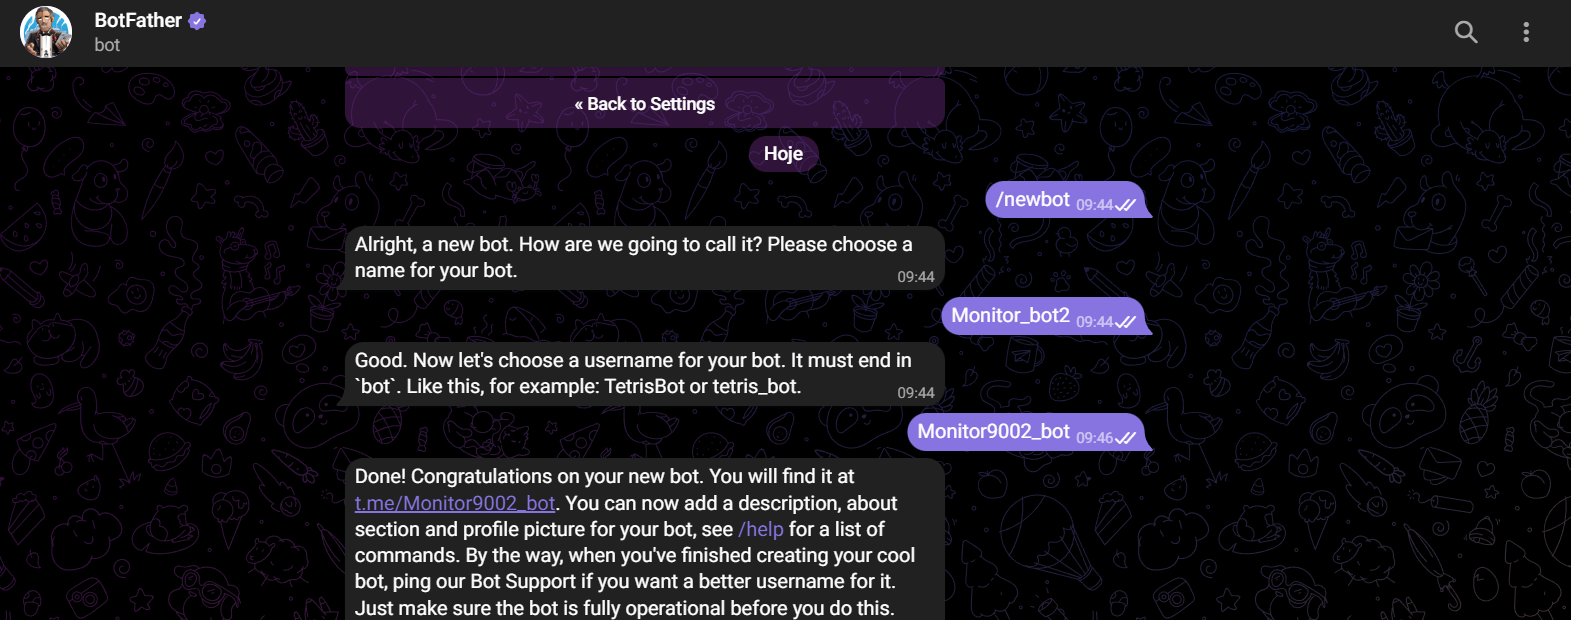

Após a criação do bot, criei um grupo ao qual tenho interesse em captar as interações entre os integrantes.

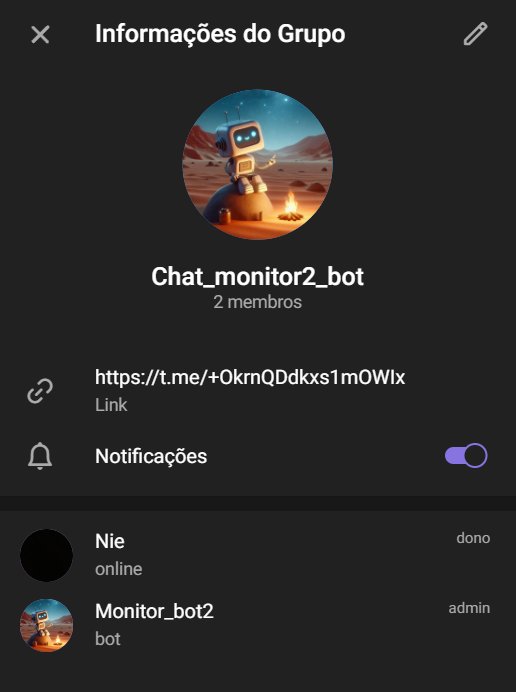

E foi configurado o bot como administrador, permitindo dessa maneira o bot poderá ouvir a conversa de todos os integrantes deste grupo.

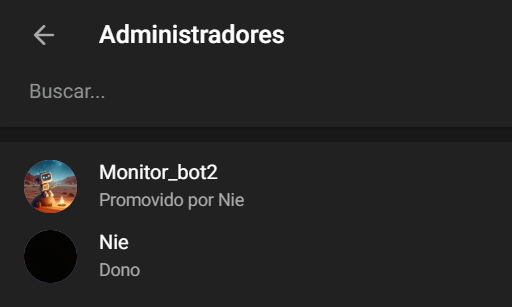

## 2.4 AWS API Gateway




O *API Gateway* é o primeiro serviço em nuvem na sequência do pipeline e faz parte dos serviços da *Amazon Web Services (AWS)*. Este serviço centraliza o gerenciamento das APIs, incluindo o recebimento de dados. No caso deste projeto, ele serve como a porta de entrada para o payload proveniente das plataformas de mensagens. O API Gateway oferece recursos como autenticação, autorização, monitoramento e escalabilidade, simplificando o processo de construção e administração de APIs de forma eficiente na infraestrutura da AWS.

*fonte: https://aws.amazon.com/pt/api-gateway/*

### 2.4.1 Criação da API para Telegram

Para a plataforma do Telegram, foi criado uma nova API com protocolo REST porém apenas o método POST, também configurado com integração do tipo proxy com o serviço Lambda.

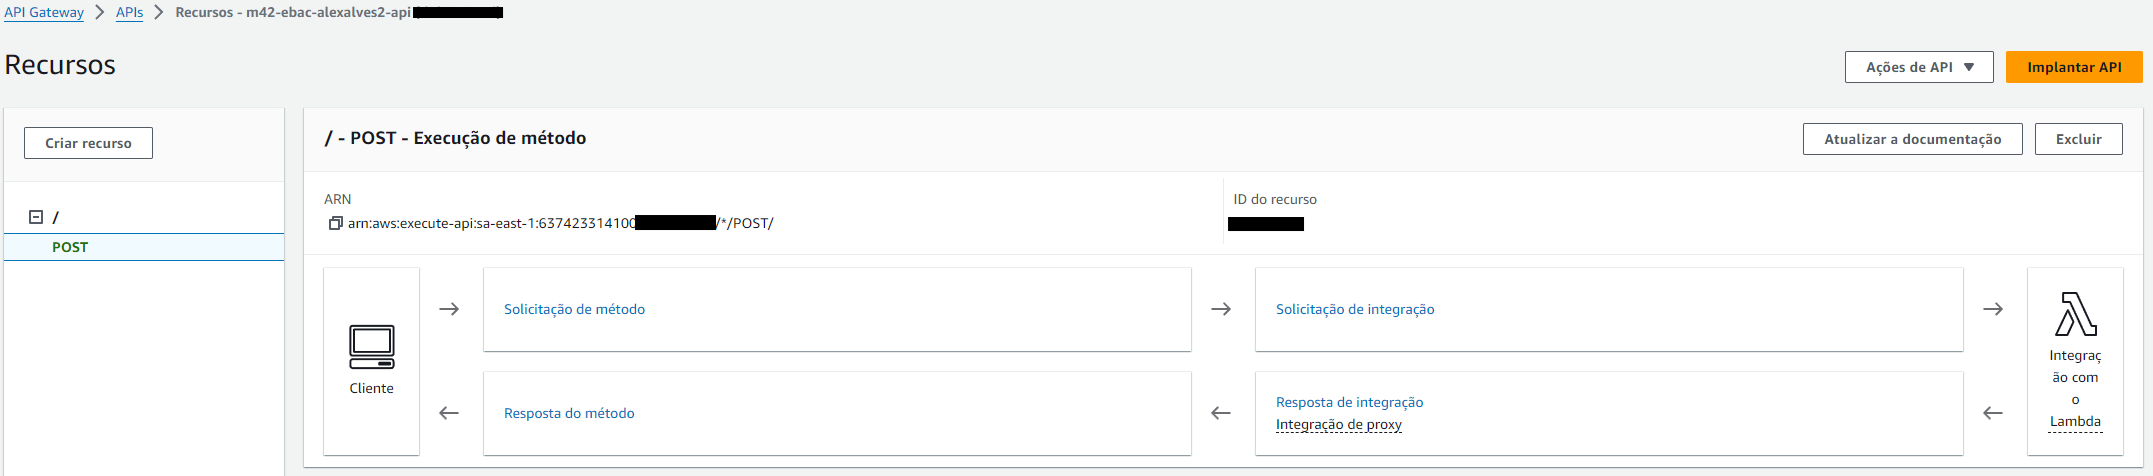

## 2.5 Webhook

Um webhook é uma ferramenta de comunicação automatizada que permite que sistemas online, geralmente APIs, enviem informações em tempo real assim que eventos específicos ocorrem. Com uma abordagem assíncrona baseada em eventos, ele opera por meio de protocolos HTTP ou HTTPS, fornecendo uma maneira ágil e eficiente de integrar plataformas e serviços online. No escopo deste projeto, o webhook será acionado pelo recebimento de uma nova mensagem, sendo responsável por encaminhar os dados úteis, também chamados de payload, de forma instantânea aos serviços em nuvem.

*fonte: https://www.redhat.com/en/topics/automation/what-is-a-webhook*

### 2.5.1 Configuração do Telegram

Para o procedimento na plataforma Telegram é preciso enviar uma requisição GET para acionar o método **setWebhook** e injetar nele o endereço URL adquirido na criação da API do AWS *API Gateway*. Abaixo segue a captura da execução da requisição:

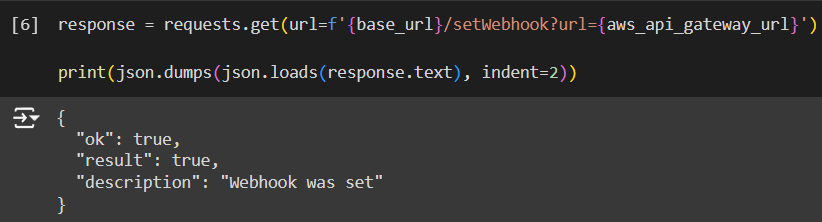

Após configurado o webhook foi possível verificar seu funcionamento com o método **getWebhookInfo**:

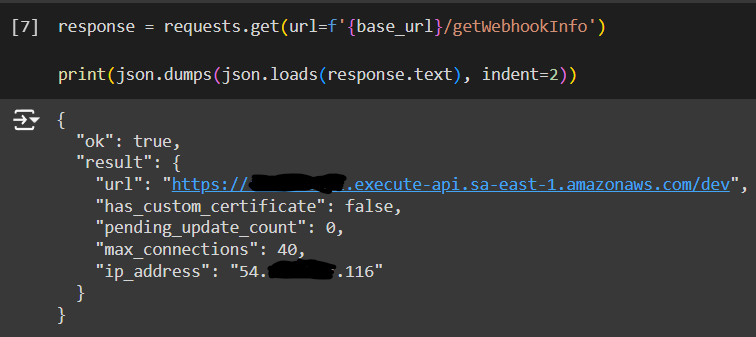

# **3. Sistema analítico**

Esses sistemas apoiam a tomada de decisões, relatórios, consultas e análises. São projetados para lidar com consultas complexas em grandes volumes de dados vindos dos sistemas transacionais, organizando esses dados e processando-os de maneira a criar insights úteis. Neste projeto, o sistema compreende a retirada dos dados brutos (raw) do datalake, a transformação deles em informações e a análise em busca de padrões e insights.

*fonte: http://bi-insider.com/posts/types-of-enterprise-data-transactional-analytical-master/*

## 3.1 O que é ETL (Extraction, Transformation, Loading)?

ETL é o processo de extrair, limpar e organizar os dados de uma origem para serem carregados, ou armazenados, em um local específico. Essa etapa é crucial para assegurar que os dados estejam em uma forma apropriada e prontos para análise antes de serem empregados em relatórios, visualizações ou em outros procedimentos analíticos.

 *fonte: https://www.ibm.com/topics/etl*

## 3.2 Extração (Extraction)

Envolve a extração, ou coleta, de dados brutos de diferentes fontes, como as APIs neste caso.

### 3.2.1 AWS Lambda

O AWS Lambda é um serviço de computação que permite a execução de código sem a necessidade de gerenciar servidores, também chamado de serverless. Com ele, é possível criar funções sem se preocupar com o escalonamento e a infraestrutura subjacente. Neste projeto, ele se encarregará de executar scripts na linguagem Python para manuseio e transformação dos dados.

*fonte: https://docs.aws.amazon.com/lambda/latest/dg/welcome.html*

### 3.2.2 AWS S3

O Amazon S3, ou Simple Storage Service, é um serviço de armazenamento que permite armazenar e recuperar dados de maneira fácil e escalável. É amplamente utilizado para armazenar arquivos, fazer backup e hospedar sistemas online, proporcionando uma solução eficiente e confiável para necessidades de armazenamento na nuvem. Neste projeto, ele armazenará tanto os dados brutos, servindo como Datalake, quanto os dados transformados e prontos para análise.

*fonte: https://docs.aws.amazon.com/AmazonS3/latest/userguide/Welcome.html*

### 3.2.3 Extração Telegram

Abaixo segue o script em Python usado para a extração dos dados do Telegram.

In [ ]:
import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

Note que a extração dos dados provenientes da *API* em formato *JSON* são direcionados para um endereço na *web* armazenado na variável `BUCKET`. Este é o nome do espaço de armazenamento do serviço *AWS S3* para onde estamos enviando os dados brutos.

## 3.3 Transformação (Transformation)

Nesta etapa, os dados coletados são processados e transformados para atender aos requisitos do destino. Isso inclui limpeza, filtragem, agregação e qualquer manipulação necessária.

### 3.3.1 Transformação Telegram (Lambda)

O script abaixo recebe os dados brutos de um bucket e retira dele somente as informações de interesse, devolvendo o dado estruturado no formato de tabela parquet.

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

* O script retorna a um bucket uma tabela no formato parquet organizada com os seguintes dados:

| Column Name      | Data Type |
|------------------|-----------|
| message_id       | int64     |
| user_id          | int64     |
| user_is_bot      | bool      |
| user_first_name  | object    |
| chat_id          | int64     |
| chat_type        | object    |
| date             | int64     |
| text             | object    |

## 3.4 Carregamento (Loading)

### 3.4.1 AWS Event Bridge

O AWS Event Bridge é um serviço que permite a criação de regras, muitas vezes baseadas em cronogramas, para acionar eventos específicos, facilitando a automação de tarefas recorrentes. Essa funcionalidade é útil para programar a execução de determinadas ações, como a ativação das funções Lambda deste projeto, conforme a agenda predefinida.

*fonte: https://docs.aws.amazon.com/eventbridge/latest/userguide/eb-what-is.html*

Para este projeto, o AWS Event Bridge foi responsável por inicializar o processo de transformação uma vez ao dia, às 00:00h. O script Python de transformação, é executados neste horário.

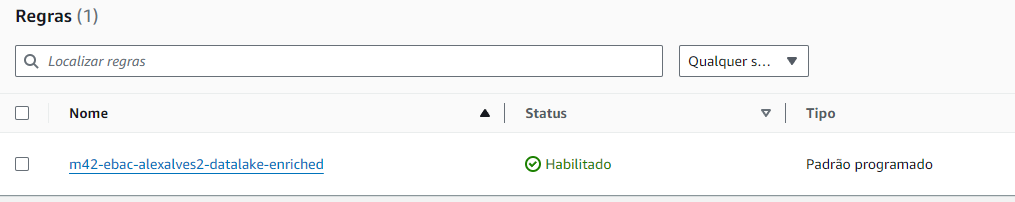

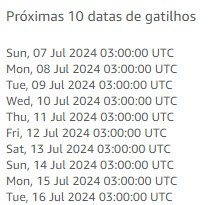

# **4. Apresentação**

Nesta fase os dados são disponibilizados para os usuários finais, como analistas e cientistas de dados, e para sistemas de consulta, como dashboards e motores de consulta. Geralmente, as informações são acessadas por meio de ferramentas de consulta, como SQL, sendo esta a principal interface para a maioria dos usuários. Nesse contexto, a etapa de apresentação utiliza o AWS Athena, uma ferramenta com motor de consulta SQL, simplificando a leitura e visualização dos dados armazenados na camada ETL para análises eficazes.

## 4.1 AWS Athena

O *AWS Athena* é um serviço de consulta interativa que permite analisar dados armazenados no Amazon S3 usando SQL padrão. Ele elimina a necessidade de carregar dados para um banco de dados permitindo explorar grandes conjuntos de dados de maneira fácil e flexível, obtendo insights valiosos sem a necessidade de infraestrutura prévia ou complexos processos de gerenciamento de dados. É especialmente útil em cenários de *Big Data* e *Data Lakes*, como no nosso caso, proporcionando uma abordagem ágil para análise de dados na nuvem. É o meio escolhido para este projeto, para visualizar e analisar as informações armazenadas.

*fonte: https://docs.aws.amazon.com/athena/latest/ug/what-is.html*

Na etapa de **apresentação**, o *AWS Athena* tem função de entregar o dados através de uma interface apropriada para os usuários do sistema analítico. Para o projeto foi criado uma tabela, e depois analisados brevemente as informações obtidas. Para a criação da tabela foi usado a linguagem *SQL*, veja abaixo alguns exemplos começando pela query de criação da tabela:

```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://<bucket>/telegram/'
```

A consulta SQL a seguir foi projetada para validar a criação bem-sucedida da tabela em nosso banco de dados. Além disso, ela confirma se os dados particionados foram corretamente capturados, armazenados e depois recuperados no serviço S3. Esta verificação é crucial para garantir a integridade dos dados antes de prosseguirmos com qualquer análise adicional.

```sql
SELECT * FROM "telegram" LIMIT 10;
```

O resultado da consulta é exibido na página do serviço *Athena* da seguinte maneira:

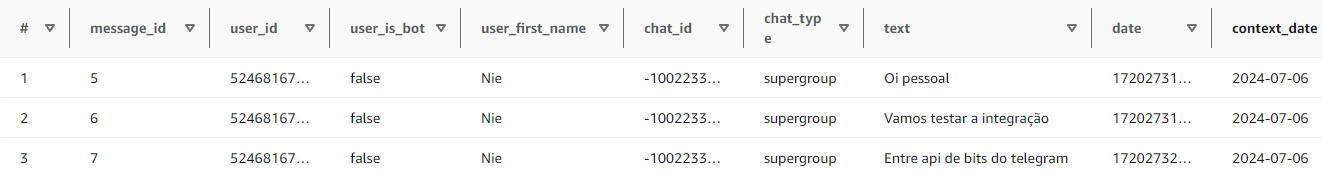

## 4.2 Análise Exploratória de Dados


Nesta seção, **logo após adicionar mais pessoas no grupo**, exploramos detalhadamente os dados enriquecidos através de consultas, buscando compreender melhor suas nuances e informações. As consultas SQL executadas no serviço Athena nos permitem gerar gráficos para análise exploratória e extração de insights. A partir dessas conclusões, podemos aprimorar nossa compreensão do comportamento dos usuários do grupo e desenvolver estratégias para melhorar sua experiência.

Utilizando a consulta de teste anterior, as informações consultadas foram representadas graficamente, exibindo as distribuições das mensagens por usuário. Este gráfico oferece insights valiosos sobre os contatos mais ativos na plataforma Telegram, destacando Daniel e Fernanda.

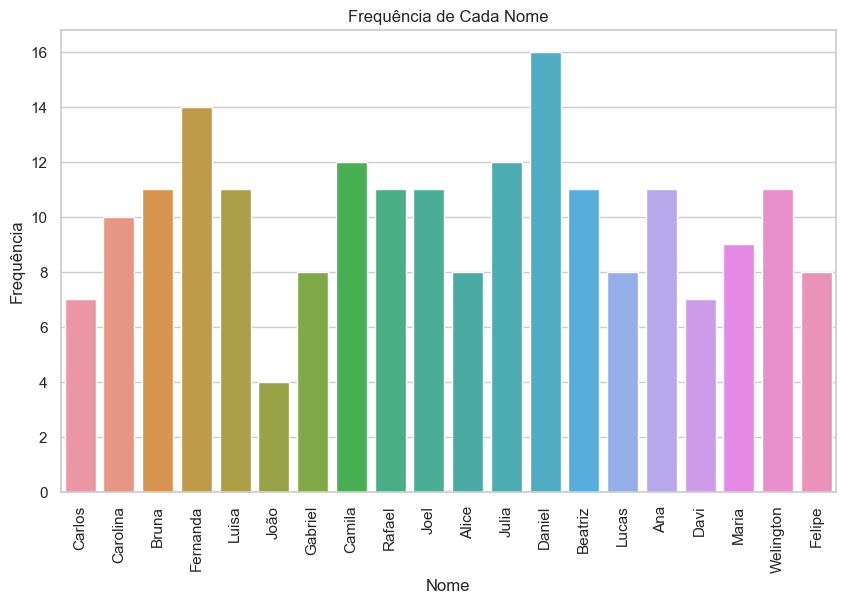

Com base nesses dados, podemos implementar um atendimento personalizado para cada um desses usuários, priorizando respostas rápidas aos contatos mais frequentes. Além disso, é possível adotar iniciativas para engajar os usuários menos ativos, visando aumentar sua participação e fortalecer os vínculos na plataforma. Essa abordagem personalizada contribui para uma gestão mais eficaz e centrada no engajamento, resultando em uma experiência mais satisfatória para todos os usuários envolvidos.

A seguir, apresentamos a visualização da contagem de repetições para a coluna de conteúdo das mensagens.

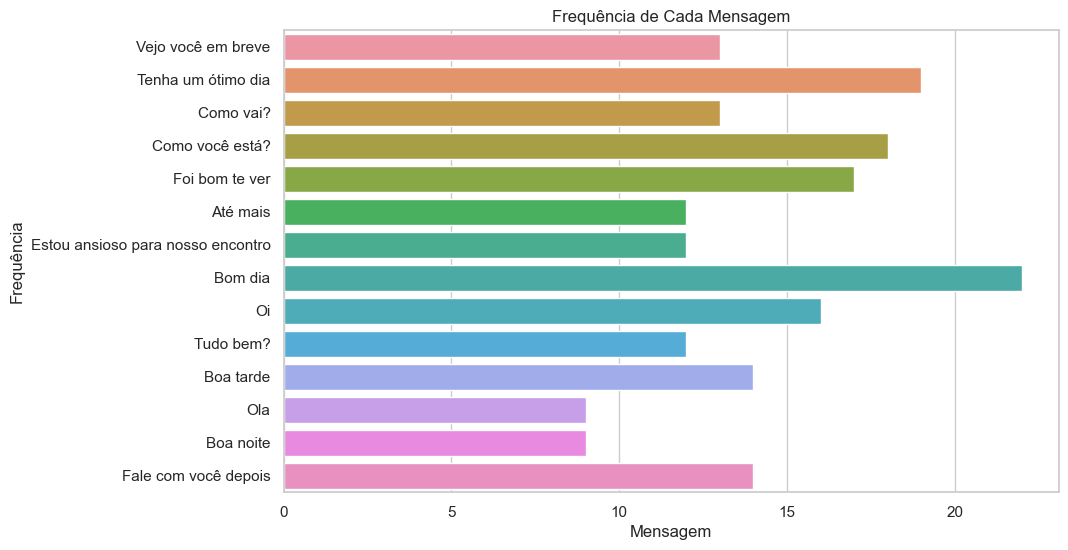

A análise revelou que a mensagem mais comum é "**Bom dia**", indicando que as interações dos usuários nesta plataforma tendem a se iniciar durante o período matutino. Essa percepção oferece insights valiosos para compreender o comportamento dos usuários ao longo do dia, possibilitando estratégias mais alinhadas com os padrões de engajamento observados.

A seguir, uma consulta SQL realizada para uma análise dos dados enriquecidos da tabela telegram. Inicialmente, converte o campo de data/hora (timestamp) para um formato legível de carimbo de data/hora. Posteriormente, extrai informações como a hora do dia, o dia da semana e o número da semana a partir do carimbo de data/hora. Por fim, agrupa os dados, contabilizando o número de mensagens para cada combinação de hora, dia da semana e número da semana. Isso proporciona um resumo da frequência das mensagens, destacando padrões temporais relevantes.

In [ ]:
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS hora_do_dia,
        EXTRACT(dow FROM parsed_date) AS dia_da_semana,
        EXTRACT(week FROM parsed_date) AS semana_do_ano
    FROM parsed_date_cte
)
SELECT
    hora_do_dia,
    dia_da_semana,
    semana_do_ano,
    count(1) AS "qtd_de_mensagens"
FROM hour_week_cte
GROUP BY
    hora_do_dia,
    dia_da_semana,
    semana_do_ano
ORDER BY
    semana_do_ano,
    dia_da_semana

O resultado dessa consulta é uma tabela semelhante a abaixo:

| hora_do_dia | dia_da_semana | semana_do_ano | qtd_de_mensagens |
|-------------------|---------------------|---------------------|----------------|
| 15                | 2                   | 46                  | 10              |
| 16                | 6                   | 46                  | 13              |
| 10                | 5                   | 47                  | 16              |
| 12                | 1                   | 47                  | 31              |
| 13                | 4                   | 47                  | 13              |
| 14                | 5                   | 47                  | 25              |
| 10                | 7                   | 47                  | 37              |
| 18                | 6                   | 47                  | 13              |
| 16                | 1                   | 48                  | 24              |
| 23                | 4                   | 48                  | 22              |
| 14                | 6                   | 48                  | 28              |
| 11                | 3                   | 48                  | 44              |
| 14                | 3                   | 48                  | 16              |
| 19                | 3                   | 49                  | 38              |
...

Cada gráfico atua como uma ferramenta para extrair informações significativas, contribuindo para uma análise mais aprofundada dos padrões e tendências presentes nos dados. Esse processo é essencial para identificar nuances que podem passar despercebidas em análises mais superficiais, melhorando assim a interpretação dos dados. Inicialmente, foi plotado um gráfico de mensagens por hora.

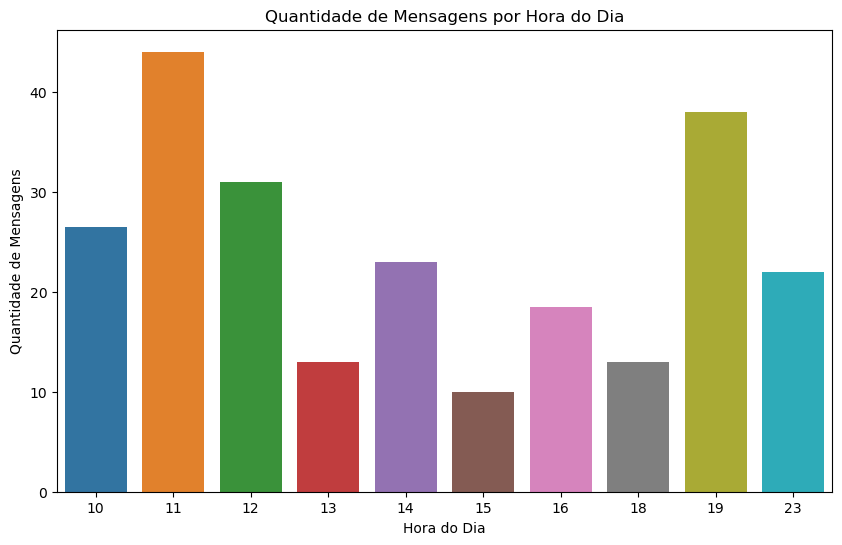!

A análise da quantidade de mensagens por hora oferece insights sobre os períodos de maior atividade no grupo. Nota-se que os horários de pico ocorrem às **11h da manhã**, ao **meio-dia** e às **19 horas**. Esses momentos coincidem com os horários de refeições, antes do almoço e antes do jantar, indicando uma pausa nas atividades para verificar mensagens. Essa informação valiosa possibilita a adaptação de abordagens mais eficazes para usuários, visando resultados aprimorados.

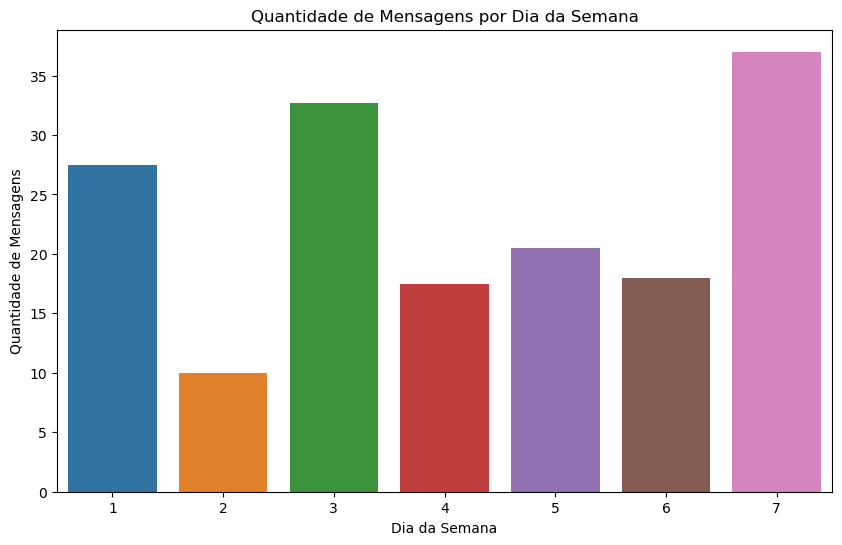

A análise da quantidade de mensagens por dia da semana revela os dias de maior movimento no grupo. Observa-se que **domingo (7)** lidera, seguido por **segunda-feira (1)** e **quarta-feira (3)**. Esses resultados indicam, conforme esperado, uma atividade mais intensa no domingo, um dia de descanso. O sábado, também considerado dia de descanso, apresenta um menor número de mensagens, sugerindo que os usuários possivelmente se envolvem em outras atividades, caracterizando-o como o "dia de sair à noite". O aumento nas mensagens na segunda-feira e quarta-feira pode refletir a relutância em retomar o trabalho na primeira semana e a monotonia do meio da semana, respectivamente.

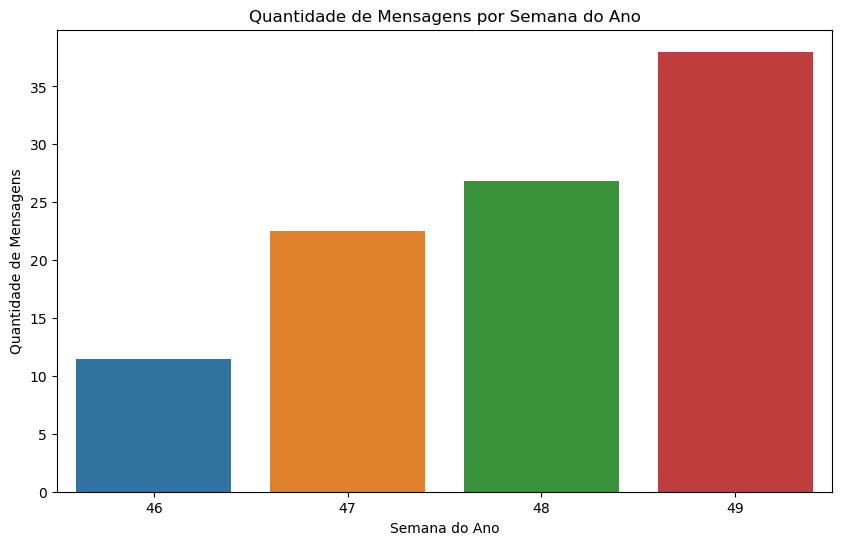

A análise da quantidade de mensagens por dia do ano oferece insights sobre os períodos de maior atividade no grupo ao longo do ano. Destaca-se a **semana 49**, correspondente ao **início de dezembro**, como o período de maior movimento. Isso sugere que, ao se aproximar o fim do ano, a interação dos usuários com a plataforma de mensagens aumenta significativamente. Essa compreensão temporal é valiosa para ajustar estratégias e alocar recursos de forma mais eficaz durante períodos de maior demanda.

# **5. Conclusão**

A convergência entre a plataforma do Telegram, a análise de dados e o uso de plataformas em nuvem, como a AWS neste projeto, otimiza de forma expressiva as operações empresariais. Essas plataformas, com interfaces ágeis disponíveis 24 horas por dia, simplificam a interação do cliente. O emprego da AWS intensifica essa interação ao oferecer escalabilidade, flexibilidade e confiabilidade, com ajustes dinâmicos de recursos conforme a demanda.

A análise de dados, impulsionada por pipelines na nuvem, torna-se ainda mais eficiente com essa abordagem, proporcionando processamento em grande escala e armazenamento seguro. Isso possibilita a extração de insights detalhados a partir de volumes substanciais de informações geradas pelas interações dos usuários nas plataformas.

As vantagens incluem também a redução de custos pela nuvem, eliminando a necessidade de investir em infraestrutura física, e a agilidade na adaptação a mudanças nas demandas operacionais, garantindo eficiência contínua. A segurança não pode ser deixada de lado, especialmente ao lidar com informações do cliente em interações nas plataformas. Plataformas em nuvem, como a AWS, implementam protocolos rigorosos, protegendo dados sensíveis contra ameaças cibernéticas.

Em resumo, essa integração proporciona uma abordagem sinérgica que aprimora a experiência do cliente na plataforma do Telegram, otimiza a eficiência operacional e oferece suporte estratégico para tomada de decisões. A aplicação de um pipeline de análise de dados desempenha um papel fundamental no cenário corporativo, fornecendo recursos para impulsionar inovação e excelência.